In [1]:
"""
Firstly, I loaded a sample of the dataset (100k rows) because the full dataset is very large.
Checked the description and found no outliers or need for feature scaling.

Then plotted w vs x vs y and observed that y depends on x in a sinusoidal pattern.

Finally, after training the Random Forest model, the actual vs predicted plot is almost a perfect diagonal line.
Errors were measured using RMSE and R² score.
"""


'\nFirstly, I loaded a sample of the dataset (100k rows) because the full dataset is very large.\nChecked the description and found no outliers or need for feature scaling.\n\nThen plotted w vs x vs y and observed that y depends on x in a sinusoidal pattern.\n\nFinally, after training the Random Forest model, the actual vs predicted plot is almost a perfect diagonal line.\nErrors were measured using RMSE and R² score.\n'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# I did this part using chatgpt cuz i dont know how to handle files

train_path = r"C:\Users\LOCALACCOUNT\Downloads\archive\train_data.csv"
test_path  = r"C:\Users\LOCALACCOUNT\Downloads\archive\test_data.csv"


In [6]:
# Using a small part 100k rows of the data set cuz it is taking a lot of time to load the entire dataset
train_sample = pd.read_csv(train_path, nrows=100_000)
print(train_sample.head())
print(train_sample.info())


     w         x         y
0 -2.5 -2.784390  0.596025
1 -2.5 -2.308732 -0.449801
2 -2.5 -3.869936 -0.301154
3 -2.5 -2.671678  0.399640
4 -2.5  6.609344  0.700448
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   w       100000 non-null  float64
 1   x       100000 non-null  float64
 2   y       100000 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB
None


In [7]:
# Checking if there are outliers and ranges of each feature for further feature scaling if needed
print("\nDescriptive stats:")
print(train_sample.describe())



Descriptive stats:
              w              x              y
count  100000.0  100000.000000  100000.000000
mean       -2.5       0.008858      -0.001366
std         0.0       5.766115       0.710738
min        -2.5      -9.999879      -1.171658
25%        -2.5      -4.956646      -0.707594
50%        -2.5      -0.011315      -0.003838
75%        -2.5       5.003172       0.708900
max        -2.5       9.999878       1.175912


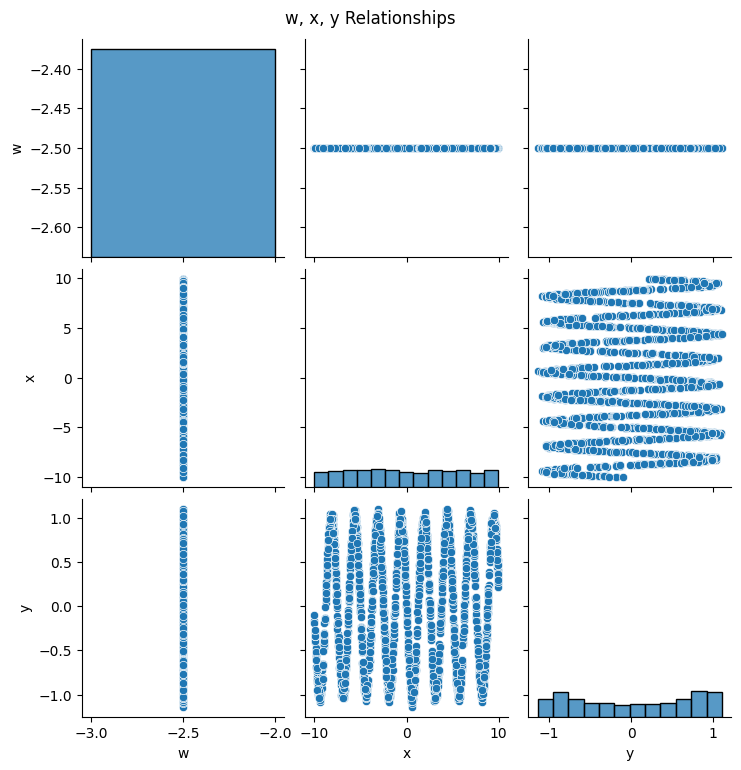

In [8]:
# Visuvalizing this data set
sns.pairplot(train_sample.sample(2000))   
plt.suptitle("w, x, y Relationships", y=1.02)
plt.show()
# By seeing this plots btw w vs x and w vs y the w has almost the same value for every data point which means w does not vary, hence it will contribute nothing to predicting y
# But the plot for x vs y is showing us y inc x dec its like a sinusodial wave the function might be some function of sin or cos 


In [9]:
# As there is nothing to remove or scale as there are no outliers or missing values or categorical values lets directly move to training part
X = train_sample[['w', 'x']]
y = train_sample['y']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
# seeing the covariance btw w , x and y
print(train_sample[['w','x','y']].corr())
# Correlation shows y depends almost entirely on x, w contributes very little


    w         x         y
w NaN       NaN       NaN
x NaN  1.000000  0.097122
y NaN  0.097122  1.000000


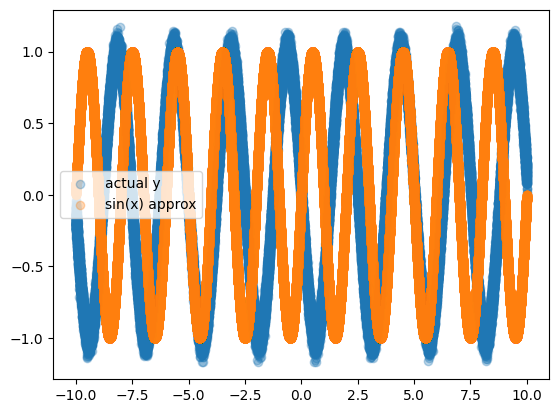

In [11]:
# Rough approximation to see if it function is pie*sinx
from numpy import sin, pi
train_sample['y_approx'] = sin(train_sample['x'] * pi)
plt.scatter(train_sample['x'], train_sample['y'], alpha=0.3, label='actual y')
plt.scatter(train_sample['x'], train_sample['y_approx'], alpha=0.3, label='sin(x) approx')
plt.legend()
plt.show()
# as the plot shows it is almost the same LOL!


In [12]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(train_sample['y'], train_sample['y_approx'])
print(f"MAE of sinusoidal approximation: {mae:.4f}")
#The approximation is around 80% which means the function is almost the same 


MAE of sinusoidal approximation: 0.8233


In [13]:
# Im using RandomForest model because as its clearly not a linear plot its something like sinusodial we will use non-linear model to predict
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)


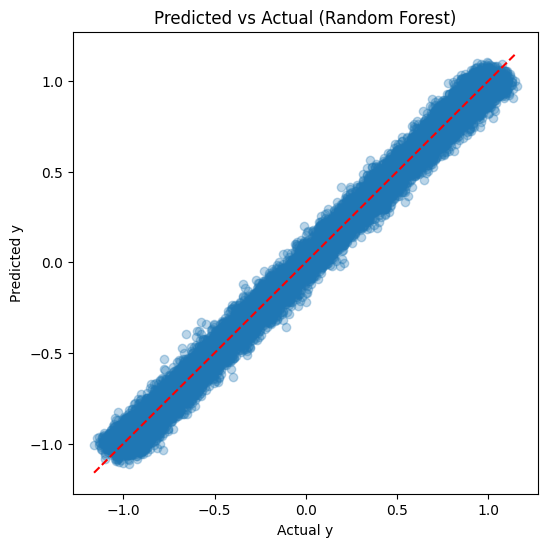

In [14]:
# Now lets visuvalize the plot for actual vs predicted 
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # diagonal line
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Predicted vs Actual (Random Forest)")
plt.show()

# As the plot clearly shows that the model is very much accurate in giving the results its a diagonal stright line 


In [15]:
# using rmse for checking how much off are we from the actual values and r2 score to see how much my model model captures the trend
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f"Validation RMSE: {rmse:.4f}")
print(f"Validation R²:   {r2:.4f}")


Validation RMSE: 0.0606
Validation R²:   0.9928


In [16]:
# For this part of the dataset the error is very small around 0.06 and r2 score is 0.99 which means 99% of the targets variance is explained

# Conclusion:
# - y is mostly determined by x in a sinusoidal pattern.
# - Random Forest can accurately capture this non-linear relationship.
# - RMSE = 0.06 and R² = 0.99 confirm the model predicts very accurately.
